# Primitive and decision tree

In [1]:
import numpy as np
import random
import math
import csv
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cv2
from sklearn.tree import DecisionTreeClassifier

# Récuperer X et Y

In [2]:
Y = []
class_names = []
found = False;
# lire dans le fichier csv
with open(r'C:\Users\gaspa\OneDrive\Bureau\COURS\ING 5\Semestre 1\Machine Learning\GTI770_label_data_set.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        found = False;
        # ne pas lire la première ligne
        if row[1] != "class":
            # permet d'ajouter les différentes classes à la liste 
            for i in range(len(class_names)):
                if row[1] == class_names[i][0]:
                    # commence le compte pour cette classe
                    if len(class_names[i]) == 0:
                        class_names[i].append(1)
                    # incrémente le compte pour atteindre 50
                    else :
                        class_names[i][1] += 1
                    found = True
            # si la classe n'existe pas encore on la rajoute. Permet de travailler avec n classes
            if found == False:
                    class_names.append([row[1]])
                    class_names[len(class_names)-1].append(1)
            for i in range(len(class_names)):
                # on verifie si la classe n'a pas encore atteind le nombre 50 pour ajouter le nouvel id
                if row[1] == class_names[i][0] and class_names[i][1] <= 50:
                    Y.append(row)
print("forme de Y" + str(np.shape(Y)))
url=''
n= []
for j in range(len(Y)):
    # creation de l'url correspond à l'id de l'image
    url = "C:/Users/gaspa/OneDrive/Bureau/COURS/ING 5/Semestre 1/Machine Learning/images_training/" + Y[j][0] + '.jpg'
    #print(url)
    i = plt.imread(url)
    n.append(i)
# creation de la matriced'image
X = np.array(n)
#print(X)
print("forme de X" + str(X.shape))

forme de Y(100, 2)
forme de X(100, 424, 424, 3)


# Séparer les parties train et test 

In [3]:
#Separate the input into training and test set
i = 0
k = 0
j = 0
y_tr = []
y_te = []
x_tr = []
x_te = []

# tant que 35 spirales et 35 smooths n'ont pas été ajoutées, on ajoute l'image dans le train
while i<=35 and k<=35 and j<100:
    if Y[j][1] == "smooth" and i <= 34:
        y_tr.append(Y[j])
        x_tr.append(X[j])
        i += 1
    if Y[j][1] == "spiral" and k < 35:
        y_tr.append(Y[j])
        x_tr.append(X[j])
        k += 1
    j += 1
# ajout des 30% dans la partie test
for m in range(0,30):
    y_te.append(Y[m])
    x_te.append(X[m])
Y_train = np.array(y_tr)
Y_test = np.array(y_te)
X_train = np.array(x_tr)
X_test = np.array(x_te)

# Crop les images de train et test

In [4]:
# crop image
f = []
c = []
for i in range(len(X_train)):
    # on crée une image en gardant uniquement les pixels entre 188 et 238 pi
    img_cropped = X_train[i][148:278, 148:278, :]
    f.append(img_cropped)
for i in range(len(X_test)):
    # on crée une image en gardant uniquement les pixels entre 188 et 238 pi
    img_cropped = X_test[i][148:278, 148:278, :]
    c.append(img_cropped)
X_test_crop = np.array(c)
X_train_crop = np.array(f)
# confirm cropped image shape
print(X_test_crop.shape)

(30, 130, 130, 3)


# Convertir en greyscale train et test

In [5]:
#Fonction pour convertir une image RGB en image Gray Scale
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140]) #On applique sur l'image en entrée un filtre

#Fonction de binairisation 
def ToBinary(x):
    #Conversion de l'image RGB en image grayscale 
    im = rgb2gray(x)
    
    #Binairisation autour de la valeur 127
    im_b = (im >170)*255
    #plt.figure()
    #plt.imshow(x)
    #plt.figure()
    #plt.imshow(im)
    #plt.figure()
    #plt.imshow(im_b)
    return im_b

X_train_binary=np.arange(1183000).reshape(70,130,130) #Création d'un tableau pour stocker les images
for i in range(0,70,1): #Binairisation de toutes les images d'entrainement  
    X_train_binary[i]=ToBinary(X_train_crop[i])
    
X_test_binary=np.arange(507000).reshape(30,130,130) #Création d'un tableau pour stocker les images
for i in range(0,30,1): #Binairisation de toutes les images d'entrainement  
    X_test_binary[i]=ToBinary(X_test_crop[i])

# Compter le nombre de points blancs et noirs

In [6]:
plot = []
for i in range(len(X_train_binary)):
    img = X_train_binary[i]
    numberOfOne = np.count_nonzero(img)
    numberOfZero = (img.shape[0]*img.shape[1])-numberOfOne
    plot.append([])
    plot[i].append(numberOfOne)
    plot[i].append(numberOfZero)
X_train_plot = np.array(plot)


plot = []
for i in range(len(X_test_binary)):
    img = X_test_binary[i]
    numberOfOne = np.count_nonzero(img)
    numberOfZero = (img.shape[0]*img.shape[1])-numberOfOne
    plot.append([])
    plot[i].append(numberOfOne)
    plot[i].append(numberOfZero)
X_test_plot = np.array(plot)

# Récupérer la valeur rouge la plus élevée

In [7]:
# crop image more on train sample
f = []
for i in range(len(X_train)):
    # on crée une image en gardant uniquement les pixels entre 188 et 238 pi
    img_c = X_train[i][168:258, 168:258, :]
    img_cropped = img_c[35:55, 35:55, :]
    #img_cropped = img_c[35:55, 35:55, :]
    f.append(img_c)
X_train_crop_little = np.array(f)


ratios = []
for i in range(len(Y_train)):
    img = X_train_crop_little[i]
    ratiob = 0
    ratior = 0
    b = 0
    r = 0
    g = 0
    b2 = 0
    g2 = 0
    r2 = 0
    bp,gp,rp = cv2.split(img)
    (minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(bp, mask = None)
    for row in range (len(bp)):
        for col in range(len(bp[row])):
            b += bp[row][col]
            r += rp[row][col]
            g += gp[row][col]
    ratiob = b/(b+r)
    ratior = r/(b+r)
    ratios.append(maxVal)
X_train_ratio = np.array(ratios)

ratios = []
for i in range(len(Y_test)):
    img = X_test_crop[i]
    bp,gp,rp = cv2.split(img)
    (minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(bp, mask = None)
    ratios.append(maxVal)
X_test_ratio = np.array(ratios)

# Faire la matrice des features

In [8]:
n = []
x = X_train_plot[:,0]
y = X_train_ratio
for i in range(len(X_train_plot)):
    n.append([x[i],y[i]])
X_train_with_primitive = np.array(n)

test = []
x = X_test_plot[:,0]
y = X_test_ratio
for i in range(len(X_test_plot)):
    test.append([x[i],y[i]])
X_test_with_primitive = np.array(test)

# Plot les primitives pour montrer le pouvoir disc

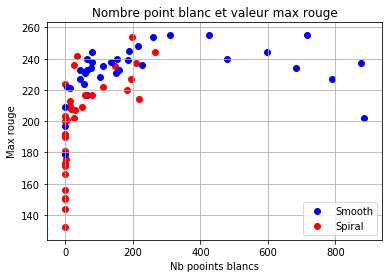

In [12]:
# plot the pouvoir discriminant des primitives 
for i in range(len(X_train_plot)):
    if Y_train[i][1] == "spiral" :
        plt.scatter(X_train_with_primitive[i][0], X_train_with_primitive[i][1], color="red",label='Spiral') 
    else:
        plt.scatter(X_train_with_primitive[i][0], X_train_with_primitive[i][1], color="blue", label='Smooth') 

plt.legend(['Smooth', 'Spiral'])
plt.grid(True)
plt.xlabel('Nb pooints blancs')
plt.ylabel('Max rouge')
plt.title('Nombre point blanc et valeur max rouge')
plt.grid(True)
plt.show()

In [13]:
# numerize the Y values 
y_train = []
y_test = []
for i in range(len(Y_train)):
    if Y_train[i][1] == "smooth":
        y_train.append(0)
    else:
        y_train.append(1)
for i in range(len(Y_test)):
    if Y_test[i][1] == "smooth":
        y_test.append(0)
    else:
        y_test.append(1)

In [14]:
# train the model of the decision tree
clf_dt = DecisionTreeClassifier(random_state=1,max_depth=2)
clf_dt.fit(X_train_with_primitive, y_train)
print ('train accuracy =', clf_dt.score(X_train_with_primitive, y_train)) # choper  la deuxieme colonne Y_train[:,1]
print ('test accuracy =', clf_dt.score(X_test_with_primitive, y_test))

train accuracy = 0.8285714285714286
test accuracy = 0.8333333333333334


In [15]:
from sklearn import tree
tree.export_graphviz(clf_dt, out_file='tree.dot')